# Real Estate Price Prediction | Regression

### GOAL : In this project, we aim to build a model that can predict a PROPERTY PRICE based on certain features like number of bedrooms, square feet, location etc. 
**We are going to work with Bengaluru (city in India) House price data which is downloaded from Kaggle.**  <br>
**Link : https://www.kaggle.com/amitabhajoy/bengaluru-house-price-data.** <br>
**We will implement various data science concepts such as cleaning, outliers detection and removal, feature engineering, dimensionality reduction, gridsearchcv for hyperparameter tunning, k fold cross validation etc.**

### Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib 

## Loading the Dataset

In [2]:
df = pd.read_csv("Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [4]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

# Section 1:  Data Cleaning & Exploratory Data Analysis 

In [5]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


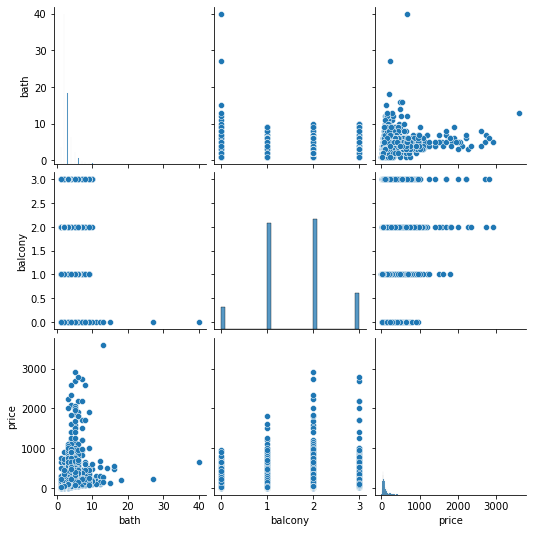

In [6]:
sns.pairplot(data=df)

In [7]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

**Let's start with the area_type feature. It's a categorical variable so let's do a count.**

In [8]:
df['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [9]:
df['location'].value_counts()

Whitefield                         540
Sarjapur  Road                     399
Electronic City                    302
Kanakpura Road                     273
Thanisandra                        234
                                  ... 
6th Block Rajaji Nagar               1
3rd Stage Raja Rajeshwari Nagar      1
Javarandoddi                         1
Banashankari stage 2                 1
Bahubali Nagar                       1
Name: location, Length: 1305, dtype: int64

**Let's drop some features that are not really important for our analysis. Here are the features that do not have considerable effect on the House Prices :** <br>
**1. area_type** <br> 
**2. availability** <br>
**3. society (We have location feature which mirrors this)** <br>

In [10]:
df.drop(['area_type','society','availability'],axis=1,inplace=True)

In [11]:
df.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   balcony     12711 non-null  float64
 5   price       13320 non-null  float64
dtypes: float64(3), object(3)
memory usage: 624.5+ KB


### Let's go ahead with this dataset for further analysis

**Let's check out the total null values in each column.**

In [13]:
df.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

<AxesSubplot:>

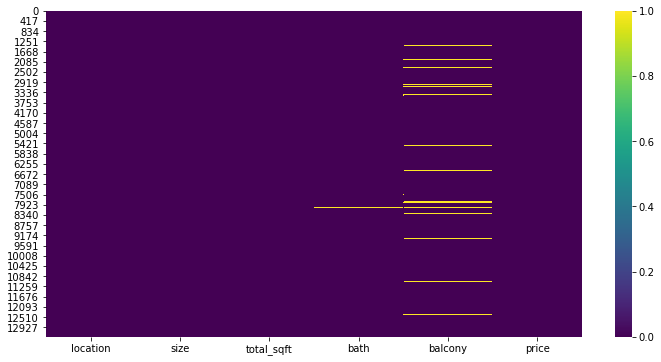

In [14]:
plt.figure(figsize=(12,6))
sns.heatmap(data=df.isnull(),cmap='viridis')

**We see that balcony feature is missing a lot of values and there's no credible way to interpolate the missing values. Let's remove this feature too.**

In [15]:
df.drop('balcony',axis=1,inplace=True)

In [16]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [18]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [19]:
((1+16+73)/13320)*100

0.6756756756756757

**The total remaining null values are less than a percent of the total dataset. Let's drop these null values.**

In [20]:
df = df.dropna()

In [21]:
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

### We have cleaned all the Null values in our dataset. Let's explore the remaining features one by one

**location feature**

In [22]:
df['location'].value_counts()

Whitefield                              534
Sarjapur  Road                          392
Electronic City                         302
Kanakpura Road                          266
Thanisandra                             233
                                       ... 
JakkurYelahanka                           1
Prakruthi Township                        1
RMV extension stage 2, rmv extension      1
Narasapura                                1
Bahubali Nagar                            1
Name: location, Length: 1304, dtype: int64

**size feature**

In [23]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

**This doesn't seem an efficient way to store the information. Let's create another column for this purpose**

In [24]:
df['bhk'] = df['size'].apply(lambda x : int(x.split(' ')[0]))

<ipython-input-24-e67bc6e88a51>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bhk'] = df['size'].apply(lambda x : int(x.split(' ')[0]))


In [25]:
df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [26]:
df['bhk'].value_counts()

2     5527
3     4832
4     1395
1      649
5      353
6      221
7      100
8       89
9       54
10      14
11       4
16       1
27       1
43       1
18       1
12       1
13       1
14       1
19       1
Name: bhk, dtype: int64

**We see certain houses with number of bedrooms too high. For example there is a houses with 43 bedroom. Surely we need to pay attention to these values.**

In [27]:
df[df['bhk']>15]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
3379,1Hanuman Nagar,19 BHK,2000,16.0,490.0,19
3609,Koramangala Industrial Layout,16 BHK,10000,16.0,550.0,16
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43
11559,1Kasavanhalli,18 Bedroom,1200,18.0,200.0,18


**We see how massive the size of these houses are by looking at the total_sqft column. Let's explore that feature**

**total_sqft feature**

In [28]:
df['total_sqft'].value_counts()

1200          843
1100          221
1500          204
2400          195
600           180
             ... 
722             1
30400           1
934 - 1437      1
2825            1
694             1
Name: total_sqft, Length: 2067, dtype: int64

In [29]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

**We see a range in one of the values. To be safe, let's examine all those values which can't be converted into float. This will give an idea of the different items in the column.**

In [30]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [31]:
df['total_sqft'].apply(is_float)

0        True
1        True
2        True
3        True
4        True
         ... 
13315    True
13316    True
13317    True
13318    True
13319    True
Name: total_sqft, Length: 13246, dtype: bool

In [32]:
df[df['total_sqft'].apply(is_float) == False]['total_sqft'].unique()

array(['2100 - 2850', '3067 - 8156', '1042 - 1105', '1145 - 1340',
       '1015 - 1540', '34.46Sq. Meter', '1195 - 1440', '4125Perch',
       '1120 - 1145', '3090 - 5002', '1160 - 1195', '1000Sq. Meter',
       '1115 - 1130', '1100Sq. Yards', '520 - 645', '1000 - 1285',
       '650 - 665', '633 - 666', '5.31Acres', '30Acres', '1445 - 1455',
       '884 - 1116', '850 - 1093', '716Sq. Meter', '547.34 - 827.31',
       '580 - 650', '3425 - 3435', '1804 - 2273', '3630 - 3800',
       '4000 - 5249', '1500Sq. Meter', '142.61Sq. Meter', '1574Sq. Yards',
       '1250 - 1305', '670 - 980', '1005.03 - 1252.49', '1004 - 1204',
       '361.33Sq. Yards', '645 - 936', '2710 - 3360', '2830 - 2882',
       '596 - 804', '1255 - 1863', '1300 - 1405', '117Sq. Yards',
       '934 - 1437', '980 - 1030', '2249.81 - 4112.19', '1070 - 1315',
       '3040Sq. Meter', '500Sq. Yards', '2806 - 3019', '613 - 648',
       '704 - 730', '1210 - 1477', '3369 - 3464', '1125 - 1500',
       '167Sq. Meter', '1076 - 1199',

**There is a lot of variety in this column than we previously inferred. It is non-uniform and unstructured. However, we notice that most of the values are indeed ranges. Other than that there are very few outliers. We can work on the ranges and ignore the other types.** <br>
**Let's deal with the range values of the column. We are going to take the average of the range every time we encounter it.**

In [33]:
def covert_range(x):
    my_splits = x.split('-')
    if len(my_splits) == 2:
        return (float(my_splits[0])+float(my_splits[1]))/2
    try:
        return float(x)
    except:
        return None

In [34]:
covert_range('1200 - 1470')

1335.0

In [35]:
covert_range('2400')

2400.0

In [36]:
covert_range('142.84Sq. Meter')

**Converting ranges into average values**

In [37]:
df['total_sqft'] = df['total_sqft'].apply(covert_range)

<ipython-input-37-6e4aa04bfef9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_sqft'] = df['total_sqft'].apply(covert_range)


**Now we shouldn't have any Non-Float values in this column.**

In [38]:
df[df['total_sqft'].apply(is_float) == False]['total_sqft'].unique()

array([], dtype=float64)

In [39]:
df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [40]:
df['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

**Let's look at the rest of the columns to see if the values are uniform**

In [41]:
df['bath'].unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9.,  8.,  7., 11., 10., 14., 27.,
       12., 16., 40., 15., 13., 18.])

In [42]:
df['bath'].dtype != 'float64'

False

In [43]:
df['price'].unique()

array([ 39.07, 120.  ,  62.  , ...,  40.14, 231.  , 488.  ])

In [44]:
df['price'].dtype != 'float64'

False

In [45]:
df2 = df.copy()

**Perfect! Looks like we have uniform data in all the columns now**

# Section 2 : Feature Engineering 

**It is critical to have the domain knowledge of the associated problem in order to add or modify certain features. For example, in real estate, price per sqr_feet is a very important quantity that could also help us detect outliers. Therefore, collaboration, intuition and discipline knowledge are essential for this operation on our data.**

In [46]:
df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


**Creating price_per_sqft column**

In [47]:
df['price_per_sqft'] = df['price']*100000/df['total_sqft']

<ipython-input-47-cae08e99f99e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_per_sqft'] = df['price']*100000/df['total_sqft']


In [48]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


**Let's check out the location column once again.**

In [49]:
df['location'].value_counts()

Whitefield                              534
Sarjapur  Road                          392
Electronic City                         302
Kanakpura Road                          266
Thanisandra                             233
                                       ... 
JakkurYelahanka                           1
Prakruthi Township                        1
RMV extension stage 2, rmv extension      1
Narasapura                                1
Bahubali Nagar                            1
Name: location, Length: 1304, dtype: int64

**We know that the location is an important factor in prices. However for the data, there are just too many unique location (1304) values to even consider them converting into dummy variables. We should consider reducing the dimensions in this column to extract meaningful information.**

### Dimensionality Reduction

**Let's look at the number of all those locations which have less than or equal to 10 data points.**

In [50]:
sum(df['location'].value_counts() <= 10)

1063

**1051 out of 1304 which is around 81% of the total locations have less than 10 data points.** <br>
**Let's put these locations in an 'other' category**

In [51]:
df['location'] = df['location'].apply(lambda x: x.strip())
location_stats = df['location'].value_counts(ascending=False)
location_less_10 = location_stats[location_stats<=10]
location_less_10

<ipython-input-51-95a735979e99>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location'] = df['location'].apply(lambda x: x.strip())


1st Block Koramangala                                 10
Dodsworth Layout                                      10
Sadashiva Nagar                                       10
Sector 1 HSR Layout                                   10
Naganathapura                                         10
                                                      ..
bsk 6th stage 2ad block near sri conversation hall     1
Raja Rajeshwari Nagara                                 1
singapura paradise                                     1
Indranagar  100ft road defence colony                  1
Bahubali Nagar                                         1
Name: location, Length: 1052, dtype: int64

In [52]:
df['location'] = df['location'].apply(lambda x: 'other' if x in location_less_10 else x)

<ipython-input-52-8188754fa940>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location'] = df['location'].apply(lambda x: 'other' if x in location_less_10 else x)


In [53]:
df['location'].value_counts()

other                        2881
Whitefield                    535
Sarjapur  Road                392
Electronic City               304
Kanakpura Road                266
                             ... 
Narayanapura                   11
Marsur                         11
Nehru Nagar                    11
Thyagaraja Nagar               11
2nd Phase Judicial Layout      11
Name: location, Length: 242, dtype: int64

**We have vastly reduced the dimensionality of this column and can convert this into dummy variables later on.**

In [54]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


# Section 3 : Outliers Detection

**To perform this operation, we can have different approaches. For example, it can be done purely on the basis of statistical analysis or sometimes it could be done if the team you are collaborating with have excellent domain knowledge. For example, if one knows real estate business, one can deduce that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft). So if we have, for example, 400 sqft apartment with 2 bhk then that seems suspicious and can be removed as an outlier. We will follow this approach and remove such outliers by keeping our minimum thresold per bhk to be 300 sqft.**

In [55]:
df[df['total_sqft']/df['bhk'] < 300]


,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,other,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,other,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649


**Need to remove these outliers**

In [56]:
df[df['total_sqft']/df['bhk'] < 300].shape # Number of ouliers

(744, 7)

In [57]:
df.shape

(13246, 7)

In [58]:
744/13246 * 100

5.616789974331874

In [59]:
df[(df['total_sqft']/df['bhk'] < 300) == False]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [60]:
df3 = df[(df['total_sqft']/df['bhk'] < 300) == False]

In [61]:
df3.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


**Let's check the price per sqft feature and remove the extremities in prices values. We need to remove these since we are going to build a generic model and it shouldn't be fed with extreme values.**

In [62]:
df3['price_per_sqft'].describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

**We look at the max and the min and immediately recognize the need to have a generic price range for our model. We could do this with the help of mean and standard deviation assuming our data is distributed normally which it should be. However, if we just take a single mean and a single standard deviation, it poses a problem since different locations should have different mean price values as price is very much dependent on the location. Therefore we do the process per location.**

In [63]:
def restrict_price_outliers(dataframe):
    df_out = pd.DataFrame()
    for key, subdf in dataframe.groupby('location'):
        mean = np.mean(subdf['price_per_sqft'])
        std = np.std(subdf['price_per_sqft'])
        reduced_df = subdf[(subdf['price_per_sqft']>(mean-std)) & (subdf['price_per_sqft']<=(mean+std))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [64]:
df4 = restrict_price_outliers(df3)

In [65]:
df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [66]:
df4.shape

(10241, 7)

**Perfect! Let's check for a given location how does the 2 BHK and 3 BHK property prices look like**

In [67]:
def plot_scatter(df,location):
    bhk2 = df[(df['location']==location) & (df['bhk']==2)]
    bhk3 = df[(df['location']==location) & (df['bhk']==3)]
    matplotlib.rcParams['figure.figsize'] = (11,7)
    plt.scatter(bhk2['total_sqft'],bhk2['price'],color='blue',label='2 BHK')
    plt.scatter(bhk3['total_sqft'],bhk3['price'],marker='+', color='green',label='3 BHK')
    plt.xlabel("Total Square Feet")
    plt.ylabel("Price (Lakh INR)")
    plt.title(location)
    plt.legend()

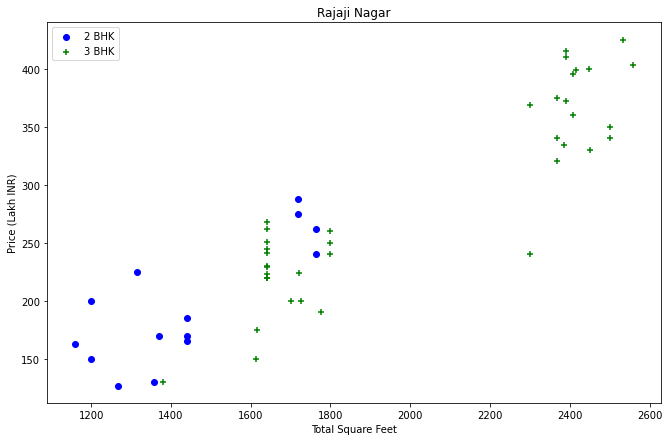

In [68]:
plot_scatter(df4,"Rajaji Nagar")

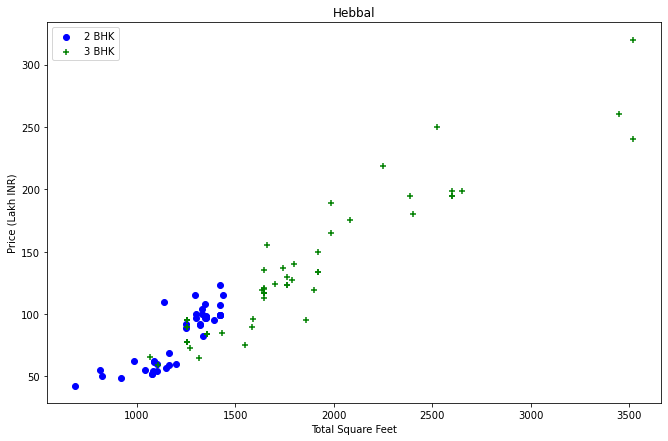

In [69]:
plot_scatter(df4,"Hebbal")

**We see an anomaly in these plots. We notice that for some properties at the same location, the price of 3 bedroom apartment is less than 2 bedroom apartment for equal total square feet area. We should remove datapoints for these 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment**

In [70]:
def restrict_bhk_outliers(df):
    exclude_indices = np.array([])
    # Grouping by location and iterating over them
    for location, location_df in df.groupby('location'): 
        # Creating bedroom dict for each location subframe
        bhk_stats = {} 
        # Grouping bedrooms for each location and iterating over them
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df['price_per_sqft']),
                'std': np.std(bhk_df['price_per_sqft']),
                'count': bhk_df.shape[0]
            }
        # Grouping bedrooms for each location and iterating over them
        for bhk, bhk_df in location_df.groupby('bhk'):
#             print (bhk)
            stats = bhk_stats.get(bhk-1)
#             print (stats)
#             print (stats['count'])
            # If stats== True and number is greater than 5
            if stats and stats['count']>5:
            # Excluding indices if 2 bhk apartment price is less than mean of 1 bhk
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df['price_per_sqft']<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [71]:
df5 = restrict_bhk_outliers(df4)

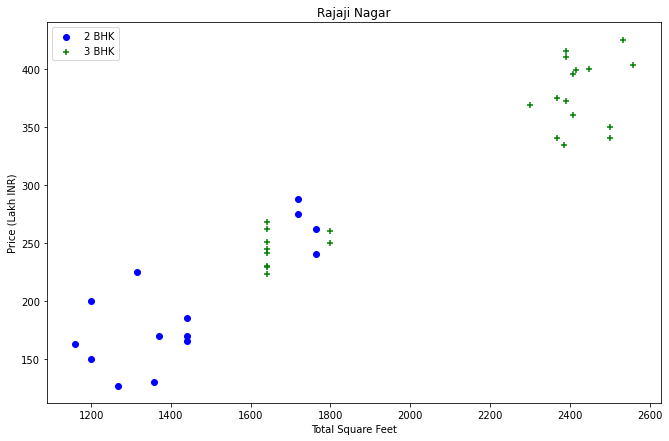

In [72]:
plot_scatter(df5,"Rajaji Nagar")

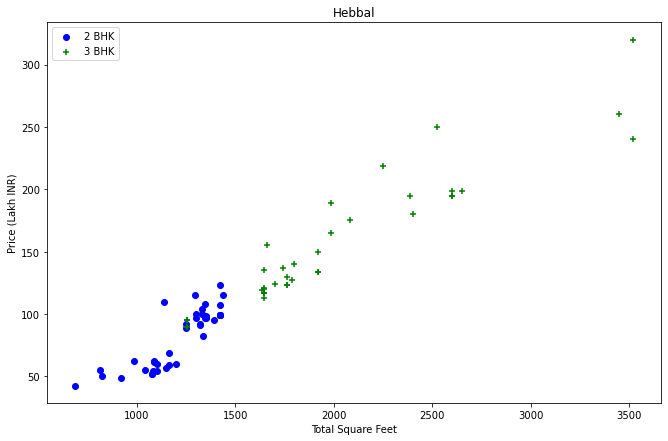

In [73]:
plot_scatter(df5,"Hebbal")

**We see considerable improvements in the dataset. Majority of the datapoints now behave exactly as we would expect, i.e for example, 3bhk price is higher than 2bhk price and so on..**
**We can use the number of bathroom feature to remove further outliers. For example, if the number of bathroom are considerably higher than the number of bedroom, we treat that datapoint as an outlier.**

Text(0, 0.5, 'Count')

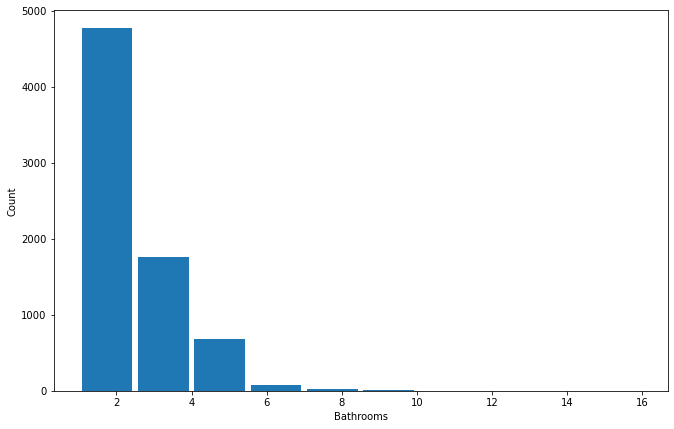

In [74]:
plt.hist(df5.bath,rwidth=0.9)
plt.xlabel("Bathrooms")
plt.ylabel("Count")

In [75]:
df5[df5['bath']>6].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
36,2nd Stage Nagarbhavi,6 Bedroom,3000.0,8.0,451.0,6,15033.333333
37,2nd Stage Nagarbhavi,6 Bedroom,2400.0,8.0,450.0,6,18750.000000
293,Abbigere,8 Bedroom,3000.0,8.0,150.0,8,5000.000000
1296,Bommanahalli,8 Bedroom,3000.0,8.0,140.0,8,4666.666667
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520


**Let's remove the datapoints with 2 more bathrooms than number of bedrooms in a home**

In [76]:
df5[df5['bath']>df5['bhk']+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [77]:
df6 = df5[df5['bath']<df5['bhk']+2]
df6

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...,...
10232,other,2 BHK,1200.0,2.0,70.0,2,5833.333333
10233,other,1 BHK,1800.0,1.0,200.0,1,11111.111111
10236,other,2 BHK,1353.0,2.0,110.0,2,8130.081301
10237,other,1 Bedroom,812.0,1.0,26.0,1,3201.970443


**Dropping some features that won't be used in modelling.**

In [78]:
df7 = df6.drop(['size','price_per_sqft'],axis='columns')

In [79]:
df7.shape

(7251, 5)

### One hot encoding for location
**Since location is a categorical column, we need to assign dummy variables in order to incorporate this in our model**

In [80]:
dummies = pd.get_dummies(df7['location'])
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
df8 = pd.concat([df7,dummies.drop('other',axis='columns')],axis='columns')
df8.head()


,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
df8.drop('location',axis='columns', inplace=True)

In [83]:
df8.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**The Data is ready now to be fed into the model.**

# Section 4 : Building the Model & Hypertuning

**We are now going to assign our Training Data (X,y). We are going to build & train the model, do hyperparameter tuning using GridsearchCV and then we will select the best model for our price prediction. We will start with Linear regression, because LR tends to perform good with these problems. We will try a couple of other models using GridsearchCV. The goal is to observe the perfomance of different models using gridsearchCV, do hyperparameter tuning and in the end select the model with the optimum performance.**

In [84]:
X = df8.drop(['price'],axis='columns') # Containing features
y = df8['price'] # Containing dependent variable 

In [85]:
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

**Dividing the data into test dataset and training dataset. Training dataset will be used to train the model, while test dataset will be used for evaluating the model performance.**

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

**Creating a Linear Regression model**

In [89]:
LR = LinearRegression()
LR.fit(X_train,y_train)
LR.score(X_test,y_test)

0.8452277697874278

**Using K Fold cross validation to measure accuracy of our LinearRegression model**

In [90]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
#Shuffle Split will randomize the dataset, so each fold isn't targeted into one area.
cross_val = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cross_val)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

**We notice that in 5 iterations we get a score above 80% most of the time. This is decent but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose**

### Let's compare Linear regression, Support Vector Regression & Random Forest Regression

In [91]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR # Support Vector Regression
from sklearn.ensemble import RandomForestRegressor # Random Forest regressor

In [92]:
model_params = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'linearregression__normalize': [True, False]
            }
        },
        'SVR': {
            'model': SVR(gamma='auto',verbose=2),
            'params': {'svr__C': [1,10,100,1000],
                       'svr__kernel': ['rbf','linear']
            }
        },
        'Random Forest': {
            'model': RandomForestRegressor(),
            'params': {
                'randomforestregressor__n_estimators': [1,5,10,50]
            }
        }
}


In [93]:
print (model_params.items())

dict_items([('linear_regression', {'model': LinearRegression(), 'params': {'linearregression__normalize': [True, False]}}), ('SVR', {'model': SVR(gamma='auto', verbose=2), 'params': {'svr__C': [1, 10, 100, 1000], 'svr__kernel': ['rbf', 'linear']}}), ('Random Forest', {'model': RandomForestRegressor(), 'params': {'randomforestregressor__n_estimators': [1, 5, 10, 50]}})])


In [94]:
for algo_name, algo in model_params.items():
    print (algo_name)
    print (algo)

linear_regression
{'model': LinearRegression(), 'params': {'linearregression__normalize': [True, False]}}
SVR
{'model': SVR(gamma='auto', verbose=2), 'params': {'svr__C': [1, 10, 100, 1000], 'svr__kernel': ['rbf', 'linear']}}
Random Forest
{'model': RandomForestRegressor(), 'params': {'randomforestregressor__n_estimators': [1, 5, 10, 50]}}


In [95]:
for algo_name, algo in model_params.items():
    print (algo['model'])
    print (algo['params'])

LinearRegression()
{'linearregression__normalize': [True, False]}
SVR(gamma='auto', verbose=2)
{'svr__C': [1, 10, 100, 1000], 'svr__kernel': ['rbf', 'linear']}
RandomForestRegressor()
{'randomforestregressor__n_estimators': [1, 5, 10, 50]}


**Now we iterate through the above dictionary, we select each model one by one and select the different parameters associated with that model. So for example, we first select the Linear Regression model in the following manner :
algo['model'] = LinearRegression() and the associated parameter will be:
algo['params'] = {'normalize': [True, False]}
We then repeat this process for the other models.**

In [96]:
scores = []
best_estimators = {}
for algo_name, algo in model_params.items():
    pipe = make_pipeline(StandardScaler(), algo['model'])
    classifier =  GridSearchCV(pipe, algo['params'], cv=cross_val, return_train_score=False,verbose=2)
    classifier.fit(X_train, y_train)
    scores.append({
        'model': algo_name,
        'best_score': classifier.best_score_,
        'best_params': classifier.best_params_
    })
    print (scores)
    best_estimators[algo_name] = classifier.best_estimator_
    
df_results = pd.DataFrame(scores,columns=['model','best_score','best_params'])

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END ...................linearregression__normalize=True; total time=   0.1s
[CV] END ...................linearregression__normalize=True; total time=   0.1s
[CV] END ...................linearregression__normalize=True; total time=   0.1s
[CV] END ...................linearregression__normalize=True; total time=   0.1s
[CV] END ...................linearregression__normalize=True; total time=   0.1s
[CV] END ..................linearregression__normalize=False; total time=   0.1s
[CV] END ..................linearregression__normalize=False; total time=   0.1s
[CV] END ..................linearregression__normalize=False; total time=   0.1s
[CV] END ..................linearregression__normalize=False; total time=   0.1s
[CV] END ..................linearregression__normalize=False; total time=   0.1s
[{'model': 'linear_regression', 'best_score': 0.8459119564800108, 'best_params': {'linearregression__normalize': True}}]
Fitting 5

# Section 5 : Regression Results

In [97]:
df_results

,model,best_score,best_params
0,linear_regression,0.845912,{'linearregression__normalize': True}
1,SVR,0.838769,"{'svr__C': 10, 'svr__kernel': 'linear'}"
2,Random Forest,0.773915,{'randomforestregressor__n_estimators': 50}


## We see that both SVM and Linear Regression performs good on our price data. Random forest is not so good for this regression under the parameters given here. We now look at the best estimator for each model.

In [98]:
best_estimators

{'linear_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('linearregression', LinearRegression(normalize=True))]),
 'SVR': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svr', SVR(C=10, gamma='auto', kernel='linear', verbose=2))]),
 'Random Forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestregressor',
                  RandomForestRegressor(n_estimators=50))])}

## We see that the Linear Regression with associated hypertuned paameters is the best regressor among all.

In [99]:
best_regressor = best_estimators['linear_regression']
best_regressor

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression(normalize=True))])

### Let's make some predictions using the Test data and evaluate the predictions

In [100]:
from sklearn import metrics
print (np.sqrt(metrics.mean_squared_error(y_test, best_regressor.predict(X_test))))

27.98688967222477


In [101]:
print (np.std(y_test))

71.13905887141193


In [102]:
range(len(X_test))

range(0, 1451)

### Let's plot out the true values and the corresponding predictions at some of the properties.

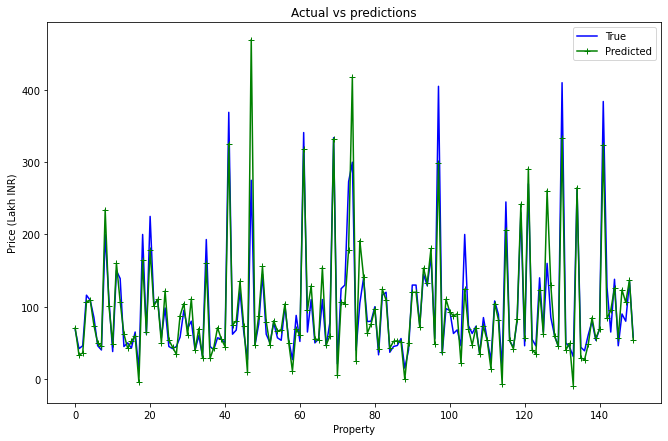

In [103]:
plt.figure()
matplotlib.rcParams['figure.figsize'] = (11,7)
plt.plot(range(len(X_test))[0:150],y_test[0:150],color='blue',label='True')
plt.plot(range(len(X_test))[0:150], best_regressor.predict(X_test)[0:150],marker='+', color='green',label='Predicted')
plt.xlabel("Property")
plt.ylabel("Price (Lakh INR)")
plt.title("Actual vs predictions")
plt.legend()

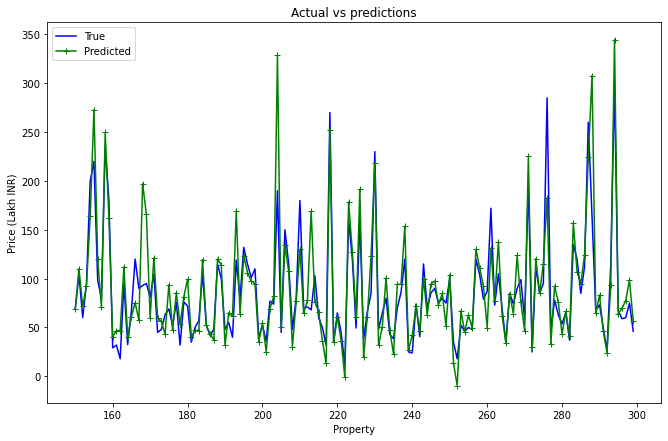

In [104]:
plt.figure()
matplotlib.rcParams['figure.figsize'] = (11,7)
plt.plot(range(len(X_test))[150:300],y_test[150:300],color='blue',label='True')
plt.plot(range(len(X_test))[150:300], best_regressor.predict(X_test)[150:300],marker='+', color='green',label='Predicted')
plt.xlabel("Property")
plt.ylabel("Price (Lakh INR)")
plt.title("Actual vs predictions")
plt.legend()

## Visually too, we notice good agreement between the predictions and the true values. 

**Let's create a function to make specific predictions based on property features**

In [105]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return best_regressor.predict([x])[0]

In [106]:
predict_price('1st Phase JP Nagar',1000, 2, 2)


83.49904676961705

In [107]:
predict_price('Indira Nagar',1000, 3, 3)


184.58430202036044

In [108]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(best_regressor,f)

## The next steps would be to use the saved model and incorporate that into a software application. This will include writing a Python Flask Server and building a website which will do actual prediction.

## Thanks for Reading!